<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Ответ" data-toc-modified-id="Ответ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ответ</a></span></li><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обоснование</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Алгоритм" data-toc-modified-id="Алгоритм-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Алгоритм</a></span></li><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обоснование</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма:-расчеты" data-toc-modified-id="Проверка-алгоритма:-расчеты-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма: расчеты</a></span><ul class="toc-item"><li><span><a href="#до-кодирования" data-toc-modified-id="до-кодирования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>до кодирования</a></span></li><li><span><a href="#после-кодирования" data-toc-modified-id="после-кодирования-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>после кодирования</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании:
- Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.
- Обосновать корректность его работы.
- При преобразовании качество моделей машинного обучения не должно ухудшиться. Подбирать наилучшую модель не требуется.

**Описание данных**:
- `Признаки:` пол, возраст и зарплата застрахованного, количество членов его семьи.
- `Целевой признак:` количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
import pandas as pd                                    # программная библиотека для обработки и анализа данных, поверх библиотеки NumPy
import numpy as np                                     # поддержка многомерных массивов; поддержка высокоуровневых математических функций
import matplotlib.pyplot as plt                        # библиотека для визуализации данных двумерной графикой

from sklearn.model_selection import train_test_split   # функция train_test_split для разделения датафрейма

from sklearn.metrics import r2_score                   # импорт метрики качества из библиотеки sklearn

In [2]:
df = pd.read_csv('/datasets/insurance.csv') #серверный путь к файлу

In [3]:
def data_description(dataframe):
    print('\033[1m' "Общий вид данных" '\033[0m')
    print(dataframe.head())
    print()
    print('\033[1m' "Общая информация о датафрейме и типе данных" '\033[0m')
    print(dataframe.info())
    print()
    print('\033[1m' "Описание данных в столбцах датафрейма" '\033[0m')
    print(round(dataframe.describe(),2))
    print()
    print('\033[1m' "Количество пропусков" '\033[0m')
    print(dataframe.isna().sum())
    print()
    print('\033[1m' "Количество дубликатов" '\033[0m')
    print(dataframe.duplicated().sum())
    print()
    print('\033[1m' "Количество дубликатов в %" '\033[0m')
    print(dataframe.duplicated().sum()/dataframe.shape[0]*100)
    print()
    for column in dataframe.columns:
        dataframe[column].hist(
            bins=100,
            grid=True,
            figsize=(15,3),
            color='green').set_xlabel(column)
        plt.show()
    
    

Общий вид данных
   Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0

Общая информация о датафрейме и типе данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

Описание данных в столбцах датафрейма
          Пол  Возраст  Зарплата  Члены семьи  Страх

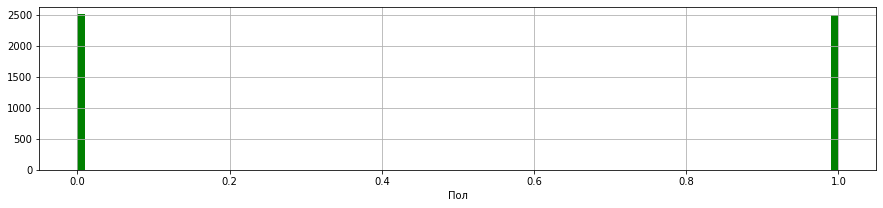

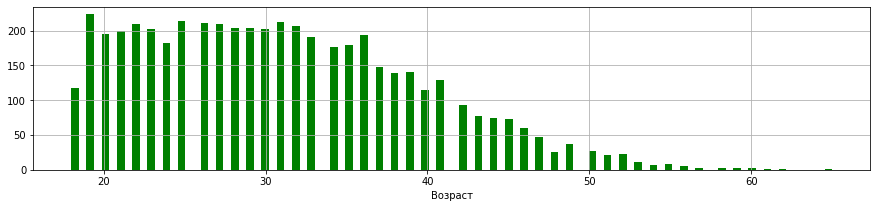

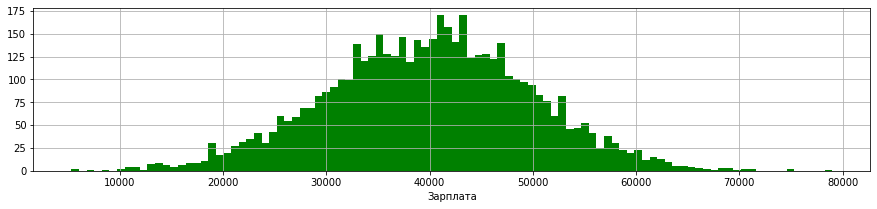

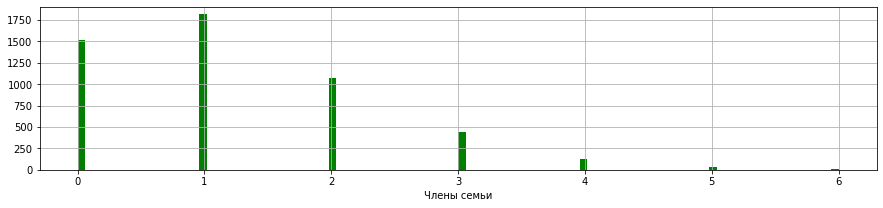

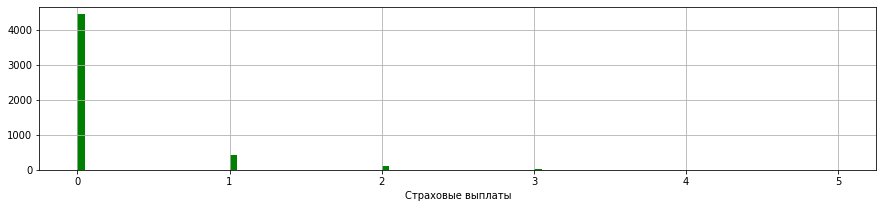

In [4]:
data_description(df)

**Выводы и решения:**
- Датафрейм представлен числовыми значениями.
    - Можно изменить тип данных до целого числа, т.к. возраст и заработная плата предствлены дробным числом.
- Пропусков в данных нет, выбросов нет согласно анализу гистограмм.
- Есть дубликаты, которые удалять не будем ввиду их незначительного количества.
- Вопрос, который надо уточнить: члены семьи равные нулю - это клиенты холостые или бездетные?

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $X^T$ — транспонированная матрица, столбцы становятся строками

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки (квадратная)

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $(matrix)^{-1}$ — обратная для квадратной матрицы, произведение котороых равно единичной матрице. 

Предсказания — умножить признаки на вес каждого:

$$
a = Xw
$$

Задача обучения — минимизировать ошибку: разницу между предсказанием и фактом:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения — взята производная, поиск локального минимума:

$$
w = (X^T X)^{-1} X^T y
$$

Укажем размерности матриц и векторов:

- $X$ — *m x n*
- $P$ — *n x n*
- $XP$ — *m x n*
- $X^T$ — *n x m*
- $P^T$ — *n x n*
- $X^T X$ — *(n x m) X (m x n) = n x n*
- $y$ — *m*
- $(matrix)^{-1}$ — *n x n*: размер не меняется для квадратной матрицы 

### Ответ

Гипотеза H0 - предсказания модели не изменятся, равны.

### Обоснование

1. Подставим в формулу $𝑋𝑃$:

$$
w_P = ((XP)^T XP)^{-1} (XP)^T y
$$

2. Раскроем скобки по правилу: $(AB)^T = B^TA^T$

$$
w_P = (P^T X^T XP)^{-1} P^T X^T y
$$

3. Раскроем скобки по правилу: $(AB)^{-1} = A^{-1}B^{-1}$, но сгруппируем $(X^TX)^{-1}$

$$
w_P = (P^T)^{-1} (X^TX)^{-1} P^{-1} P^T X^T y
$$

4. Проверим размерности множителей для возможности перестановки переменных в формуле:

$$ size = (nxn) (nxn) (nxn) (nxn) (nxm) m $$

5. Переставим множители, кроме последних двух:

$$
w_P = (P^T)^{-1} P^T P^{-1} (X^TX)^{-1} X^T y
$$

6. В результате $(P^T)^{-1} P^T = E $ - единичная матрица, $(X^TX)^{-1} X^T y = w$ 

$$
w_P = E P^{-1} w
$$

или 

$$
w_P = P^{-1} w
$$

7. Подставим результат в формулу предсказаний:

$$
a_P = XP𝑃^{−1}𝑤 
$$

$$
a_P = XE𝑤
$$

$$
a_P = X𝑤
$$

$$
a_P = a
$$

**Вывод:** Предсказания модели не изменятся после умножения на квадратную обратимую матрицу, но изменятся веса признаков, а значит необходимо переобучение модели после кодирования.

## Алгоритм преобразования

### Алгоритм

In [5]:
features = df.drop(columns=['Страховые выплаты']) #соберем признаки
target = df['Страховые выплаты']                  #соберем целевой признак

In [6]:
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [7]:
# создадим случайную матрицу для кодирования исходной (признаки)
# для перемножения матриц ширина первой матрицы равна высоте второй матрицы, а количество столбцов должно остаться прежним
# в результате получается квадратная матрица

P = np.random.normal(size=(features.shape[1], features.shape[1]))

In [8]:
P.shape

(4, 4)

In [9]:
# перемножим матрицы и проверим успешность кодирования
features_coded = features.dot(P)

In [10]:
features_coded.head()

,0,1,2,3
0,-66960.375319,-66005.279903,-96542.242248,42290.602239
1,-51308.742327,-50551.405392,-73951.129342,32438.718622
2,-28357.969263,-27930.277569,-40865.353145,17935.969530
3,-56284.422202,-55512.745408,-81173.785188,35518.170436
4,-35240.396776,-34722.930308,-50797.634900,22271.301157


In [11]:
# найдем обратную матрицу для декодирования зашифрованной

P1 = np.linalg.inv(P)

In [12]:
# перемножим матрицы и проверим успешность декодирования
features_decoded = features_coded.dot(P1)

In [13]:
features_decoded.columns=[features.columns]

In [14]:
round(features_decoded,0).head()

,Пол,Возраст,Зарплата,Члены семьи
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,-0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


При округлении полученные после декодирования значения признаков близки к истинным.

### Обоснование

`На основании пункта №2.2 умножение признаков в матрице на квадратную обратимую матрицу с целью шифрования не изменит прогноза модели, но изменятся веса признаков, а значит требуется переобучить модель после кодирования.`

## Проверка алгоритма: расчеты

### до кодирования

In [22]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target,
    test_size=0.25,
    random_state=42)

In [23]:
class LinearRegression:
    def fit(self, train_features, train_target):
        
         # добавляем столбец 1 к массиву признаков
        
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        
        # Транспонированная матрица признаков умножается на себя: X.T.dot(X)
        # Вычисляется обратная к результату матрица: np.linalg.inv()
        # Обратная умножается на транспонированную матрицу признаков: .dot(X.T)
        # Результат умножается на вектор значений целевого признака: .dot(y)
        
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [17]:
model = LinearRegression()                      # загружаем самодельную модель
model.fit(features_train, target_train)         # обучаем модель на обучающей выборке
predictions = model.predict(features_valid)     # предсказания на обучающей выборке
print("Значение метрики R2:", round(r2_score(target_valid, predictions),9))      # поиск значения метрики r2

Значение метрики R2: 0.425477854


### после кодирования

In [18]:
features_coded = features.dot(P)           # шифруем признаки умножением на матрицу
target_2 = df['Страховые выплаты']         # целевой признак остается без изменения

In [19]:
features_train_coded, features_valid_coded, target_train_2, target_valid_2 = train_test_split(features_coded, target_2, test_size=0.25, random_state=42)

In [20]:
model_coded = LinearRegression()                                       # загружаем самодельную модель
model_coded.fit(features_train_coded, target_train_2)              # обучаем модель на обучающей выборке
predictions_coded = model_coded.predict(features_valid_coded)          # предсказания на обучающей выборке
print("Значение метрики R2:", round(r2_score(target_valid_2, predictions_coded),9))      # поиск значения метрики r2

Значение метрики R2: 0.425477829


## Вывод

**Метрика качества модели R2 на закодированных данных и данных без обработки получилось одинаковая до 6 знака после запятой. Незначительное отличие вызвано особенностью преобразования матриц и чисел с плавающей точкой.**

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования